Create a list of models' mean error between seeds and sort them.

In [9]:
import os
import regex as re
import pandas as pd
import json

# Define the directory path
directory = '/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption'
counter = 0
# Initialize an empty dataframe
df = pd.DataFrame(columns=['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size', 'Model MAE', 'Validation MAE',
 "Model Max AE", "Validation Max AE"])#, "Model Wrong i_a", "Validation Wrong i_a",
#"Model Consumption MAE", "Validation Consumption MAE", "Model Consumption Max AE", "Validation Consumption Max AE", 
#"Model i_a MAE", "Validation i_a MAE", "Model i_a Max AE", "Validation i_a Max AE"])
for root, _,files in os.walk(directory):
    for filename in files:

        if filename.endswith('.log') and filename != '._info.log':

            filepath = os.path.join(root, filename)

            # Read the contents of the file
            with open(filepath, 'r') as file:
                content = file.read()  

            # Extract the seed, model type, max nodes, and learning rate from the corresponding config file

            configpath = filepath.replace('info.log', 'config.json')
            configpath = configpath.replace('log', 'models')
            print(configpath)
            with open(configpath, 'r') as f:
                config = json.load(f)
            seed = config["seed"]
            model_type = config["arch"]["type"]
            max_nodes = config["arch"]["args"]["max_nodes"]
            learning_rate = config["optimizer"]["args"]["lr"]
            batch_size = config["data_loader"]["args"]["batch_size"]

            print(seed, model_type, max_nodes,learning_rate, batch_size)   



            # Extract the MAE value just before the last instance of saving the best model
            with open(filepath, 'r') as file:
                text = file.read()

            best_loc = text.rfind('Saving current best: model_best.pth ...')

            before_best = text[:best_loc]

            mmaetarget = re.search(r'\s+model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            model_mae= float(mmaetarget.group(1))
            mmxaetarget = re.search(r'\s+model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            model_max_ae= float(mmxaetarget.group(1))
            #mwiatarget = re.search(r'\s+n_wrong_i_a\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #model_wrong_i_a= float(mwiatarget.group(1))
            #cmaetarget = re.search(r'\s+consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #consumption_mae= float(cmaetarget.group(1))
            #cmaxaetarget = re.search(r'\s+consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #consumption_max_ae= float(cmaxaetarget.group(1))
            #iamaetarget = re.search(r'\s+i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #i_a_mae= float(iamaetarget.group(1))
            #iamxaetarget = re.search(r'\s+i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #i_a_max_ae= float(iamxaetarget.group(1))
            vmaetarget = re.search(r'\s+val_model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_mae= float(vmaetarget.group(1))        
            vmxaetarget = re.search(r'\s+val_model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_max_ae= float(vmxaetarget.group(1))
            #vwiatarget = re.search(r'\s+val_n_wrong_i_a\s*:\s+(\d+)', before_best, re.REVERSE)
            #val_wrong_i_a= float(vwiatarget.group(1))
            #vcmaetarget = re.search(r'\s+val_consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #val_consumption_mae= float(vcmaetarget.group(1))
            #vcmaxaetarget = re.search(r'\s+val_consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #val_consumption_max_ae= float(vcmaxaetarget.group(1))
            #viamaetarget = re.search(r'\s+val_i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #val_i_a_mae= float(viamaetarget.group(1))
            #viamxaetarget = re.search(r'\s+val_i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            #val_i_a_max_ae= float(viamxaetarget.group(1))
            #print(f"model_mae: {model_mae},\n val_mae: {val_mae},\n model_max_ae: {model_max_ae},\n val_max_ae: {val_max_ae},\n model_wrong_i_a: {model_wrong_i_a},\n val_wrong_i_a: {val_wrong_i_a},\n consumption_mae: {consumption_mae},\n val_consumption_mae: {val_consumption_mae},\n consumption_max_ae: {consumption_max_ae},\n val_consumption_max_ae: {val_consumption_max_ae},\n i_a_mae: {i_a_mae},\n val_i_a_mae: {val_i_a_mae},\n i_a_max_ae: {i_a_max_ae},\n val_i_a_max_ae: {val_i_a_max_ae}")

           
            # Append the data to the dataframe
            df = pd.concat([df,pd.DataFrame.from_records([{'Seed': seed, 'Model Type': model_type, 'Max Nodes': max_nodes, "Learning Rate": learning_rate, "Batch Size": batch_size, 
             'Model MAE': model_mae, 'Validation MAE':val_mae, "Model Max AE": model_max_ae, "Validation Max AE":val_max_ae}])])#, 
             #"Model Wrong i_a": model_wrong_i_a, "Validation Wrong i_a":val_wrong_i_a, "Model Consumption MAE": consumption_mae, "Validation Consumption MAE":val_consumption_mae, 
             #"Model Consumption Max AE": consumption_max_ae, "Validation Consumption Max AE":val_consumption_max_ae, "Model i_a MAE": i_a_mae, "Validation i_a MAE":val_i_a_mae, 
             #"Model i_a Max AE": i_a_max_ae, "Validation i_a Max AE":val_i_a_max_ae}])])

# Print the resulting dataframe
print(df)
df.to_csv('nnperformance-August2024.csv', index=False)


/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_133930/config.json
21 FiveLayer 512 0.001 64
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_140925/config.json
21 FiveLayer 512 0.01 64
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_144102/config.json
21 FiveLayer 512 0.0001 64
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_142628/config.json
21 FiveLayer 512 0.01 128
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_135732/config.json
21 FiveLayer 512 0.001 128
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_145955/config.json
21 FiveLayer 512 0.0001 128
/Volumes/NNFunction/nnbellman-AugustOutput/saved/consumption/S21/models/cons_FiveLayer_512/0830_151307/config.json
21 FiveLayer 512 0.0001 512
/Volumes

In [10]:
means=df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[df.columns[5:19]].mean()


print(f'Lowest Model MAE: {means.loc[means["Model MAE"].idxmin()].name}')
print(f'Lowest Validation MAE: {means.loc[means["Validation MAE"].idxmin()].name}')
print(f'Lowest Model Max AE: {means.loc[means["Model Max AE"].idxmin()].name}')
print(f'Lowest Validation Max AE: {means.loc[means["Validation Max AE"].idxmin()].name}')
# print(f'Lowest Model Wrong i_a: {means.loc[means["Model Wrong i_a"].idxmin()].name}')
# print(f'Lowest Validation Wrong i_a: {means.loc[means["Validation Wrong i_a"].idxmin()].name}')
# print(f'Lowest Model Consumption MAE: {means.loc[means["Model Consumption MAE"].idxmin()].name}')
# print(f'Lowest Validation Consumption MAE: {means.loc[means["Validation Consumption MAE"].idxmin()].name}')
# print(f'Lowest Model Consumption Max AE: {means.loc[means["Model Consumption Max AE"].idxmin()].name}')
# print(f'Lowest Validation Consumption Max AE: {means.loc[means["Validation Consumption Max AE"].idxmin()].name}')
# print(f'Lowest Model i_a MAE: {means.loc[means["Model i_a MAE"].idxmin()].name}')
# print(f'Lowest Validation i_a MAE: {means.loc[means["Validation i_a MAE"].idxmin()].name}')
# print(f'Lowest Model i_a Max AE: {means.loc[means["Model i_a Max AE"].idxmin()].name}')
# print(f'Lowest Validation i_a Max AE: {means.loc[means["Validation i_a Max AE"].idxmin()].name}')

Lowest Model MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model Max AE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation Max AE: ('PudgeSixLayer', 512, 0.001, 64)


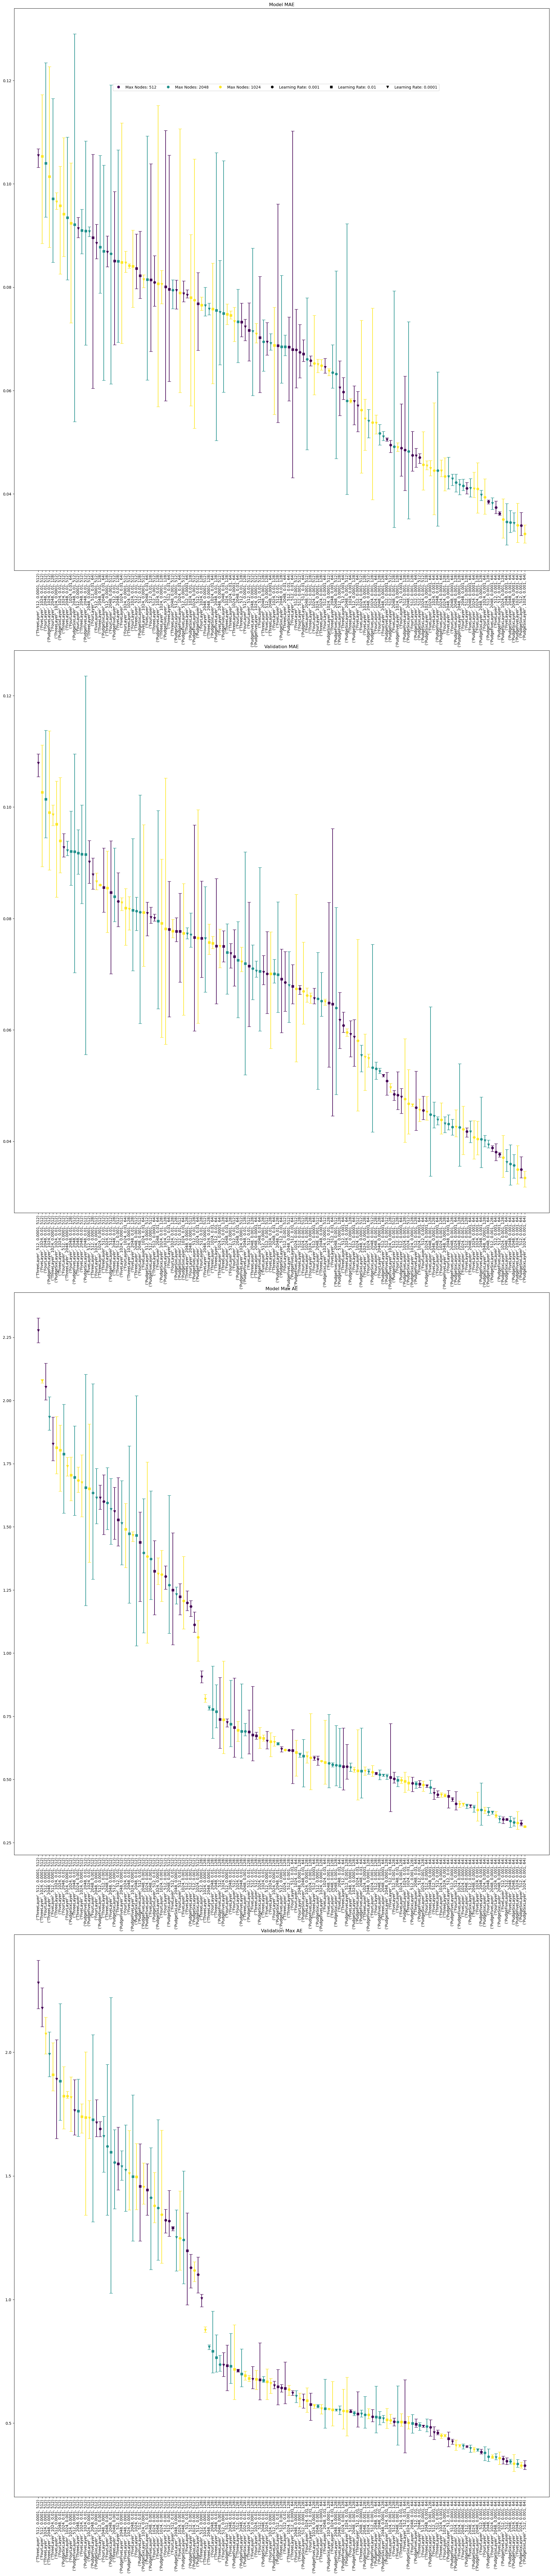

  Seed     Model Type Max Nodes  Learning Rate Batch Size  Model MAE  \
0   21  PudgeSixLayer      1024          0.001         64   0.030486   
0   42  PudgeSixLayer      1024          0.001         64   0.032287   
0   84  PudgeSixLayer      1024          0.001         64   0.033985   

   Validation MAE  Model Max AE  Validation Max AE  
0        0.031793      0.315380           0.326213  
0        0.033924      0.315418           0.342618  
0        0.034672      0.310875           0.318203  


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Define the metrics
metrics = ['Model MAE', 'Validation MAE', 'Model Max AE', 'Validation Max AE']#, 
           #'Model Wrong i_a', 'Validation Wrong i_a', 'Model Consumption MAE', 
           #'Validation Consumption MAE', 'Model Consumption Max AE', 
           #'Validation Consumption Max AE', 'Model i_a MAE', 'Validation i_a MAE', 
           #'Model i_a Max AE', 'Validation i_a Max AE']

# Create a figure with 14 subplots arranged in a 14x1 grid
fig, axs = plt.subplots(len(metrics), 1, figsize=(20, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define a color map for the max nodes
max_nodes = df['Max Nodes'].unique()
colors = plt.cm.get_cmap('viridis', len(max_nodes))
color_map = {node: colors(i) for i, node in enumerate(max_nodes)}

# Define a marker map for the learning rates
learning_rates = df['Learning Rate'].unique()
markers = ['o', 's', 'v', '^', '<', '>', '8', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
marker_map = {rate: markers[i % len(markers)] for i, rate in enumerate(learning_rates)}

# Create custom legend handles and labels
handles = [mlines.Line2D([], [], color=color_map[node], marker='o', linestyle='None') for node in max_nodes] + [mlines.Line2D([], [], color='black', marker=marker_map[rate], linestyle='None') for rate in learning_rates]
labels = [f'Max Nodes: {node}' for node in max_nodes] + [f'Learning Rate: {rate}' for rate in learning_rates]

# For each metric, create a scatter plot with error bars
for i, metric in enumerate(metrics):
    # Calculate the mean, min, and max for each group
    group_stats = df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[metric].agg(['mean', 'min', 'max'])
    
    # Sort the groups in descending order based on mean value
    group_stats = group_stats.sort_values(by='mean', ascending=False)
    
    # Create the scatter plot with colors corresponding to the max nodes and markers corresponding to the learning rate
    x = np.arange(len(group_stats))
    for j, (group, stats) in enumerate(group_stats.iterrows()):
        model_type, max_node, learning_rate, _ = group
        axs[i].errorbar(j, stats['mean'], yerr=[[stats['mean']-stats['min']], [stats['max']-stats['mean']]], fmt=marker_map[learning_rate], capsize=4, color=color_map[max_node])
    
    # Set the title of the subplot
    axs[i].set_title(metric)
    
    # Set the x-ticks to be the group names
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(group_stats.index, rotation=90)

# Add the legend to the figure
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Leave more space for the x-axis names
plt.subplots_adjust(bottom=0.1)

# Show the plot
plt.show()

print(df[(df['Model Type'] == 'PudgeSixLayer') & (df['Max Nodes'] == 1024) & (df['Learning Rate'] == 0.001) & (df['Batch Size'] == 64)])